<a href="https://colab.research.google.com/github/kvinne-anc/Regression-Models/blob/main/Regression_NYC_RentalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rent = df.drop(['bathrooms', 'bedrooms', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space'], axis=1) 

In [ ]:
rent.head()

,created,description,display_address,latitude,longitude,price,street_address,interest_level
0,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium
1,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low
2,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high
3,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low
4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low


In [ ]:
rent['created'] = pd.to_datetime(rent['created']).dt.strftime('%Y-%m-%d')

In [ ]:
rent.head()

,created,description,display_address,latitude,longitude,price,street_address,interest_level
0,2016-06-24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium
1,2016-06-12,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low
2,2016-04-17,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high
3,2016-04-18,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low
4,2016-04-28,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low


In [ ]:
#Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test 

In [ ]:
rent['created'] = pd.to_datetime(rent['created'])
rent = df.set_index(rent['created'])
rent = df.sort_index()

In [ ]:
# create train test partition

split_date ='2016-06-01'
train_data = rent.loc[rent['created'] <= split_date]
test_data = rent.loc[rent['created'] > split_date]
train_data.shape, test_data.shape

((31844, 34), (16973, 34))

In [ ]:
!pip install geopandas

In [ ]:
!pip install descartes

In [ ]:
#Engineer at least two new features. (See below for explanation & ideas.)

In [ ]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
!pip install tqdm==4.36.0
from tqdm._tqdm_notebook import tqdm_notebook

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

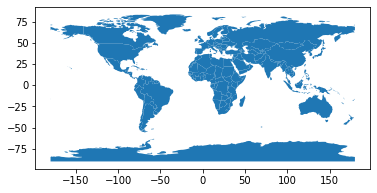

In [ ]:
world.plot()

In [ ]:
locator = Nominatim(user_agent='myGeocoder')
coordinates = '53.480837, -2.244914'
location = locator.reverse(coordinates)
location.raw

{'address': {'building': 'Eagle Insurance Buildings',
  'city': 'Manchester',
  'country': 'United Kingdom',
  'country_code': 'gb',
  'county': 'Greater Manchester',
  'house_number': '68',
  'neighbourhood': 'Chinatown',
  'postcode': 'M2 4JG',
  'road': 'Cross Street',
  'state': 'England',
  'state_district': 'North West England',
  'suburb': 'City Centre'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576'],
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, Chinatown, City Centre, Manchester, Greater Manchester, North West England, England, M2 4JG, United Kingdom',
 'lat': '53.4809597',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-2.2450668274629235',
 'osm_id': 37139875,
 'osm_type': 'way',
 'place_id': 96393663}

In [ ]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(rent, lat='latitude', lon='longitude', zoom=15)

In [ ]:
rent['geom'] = rent['latitude'].map(str) + ',' + rent['longitude'].map(str)
rent['geom'][0]


'40.7145,-73.9425'

In [ ]:
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse)
rgeocode

In [ ]:
!pip install reverse_geocoder

In [ ]:
from geopy.geocoders import Nominatim

borough = []
loc = rent['geom']
for l in loc:
    sub = str(locator.reverse(l))
    borough.append(sub.split(', ')[2])
borough
## ['Upper East Side', 'East Harlem']

KeyboardInterrupt: ignored

In [ ]:
#the runtime on this is crazy long - not sure if there is a better or more efficient way to reverse geocode these coordinates into neighborhoods. 

In [ ]:
split_date ='2016-06-01'
train_data = rent.loc[rent['created'] <= split_date]
test_data = rent.loc[rent['created'] > split_date]
train_data.shape, test_data.shape

((31844, 35), (16973, 35))

In [ ]:
train_data['price'].mean()

3575.604007034292

In [ ]:
test_data['price'].mean()

3587.0546750721733

In [ ]:
# Fit a linear regression model with at least two features.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features = ['latitude', 'longitude']
target = 'price'
X_train = rent[features]
y_train = rent[target]

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Get the model's coefficients and intercept.

In [ ]:
print(regressor.intercept_)

-1302468.0701019831


In [ ]:
print(regressor.coef_)

[  2351.49144393 -16360.38174183]


ValueError: ignored

In [ ]:
#Get regression metrics RMSE, MAE, and  R2 , for both the train and test data.

In [ ]:
#What's the best test MAE you can get? Share your score and features used with your cohort on Slack!